# Gold Price Prediction

### Einleitung

Die Vorhersage von Goldpreisen ist ein bedeutendes und herausforderndes Thema in der Finanzanalyse, da Gold als ein sicherer Hafen und als Absicherung gegen wirtschaftliche Unsicherheiten betrachtet wird. Die Fähigkeit, zukünftige Goldpreise genau vorherzusagen, kann Investoren und Analysten helfen, fundierte Entscheidungen zu treffen und Risiken besser zu managen.

In dieser Analyse verwenden wir Daten, die mehrere wirtschaftliche Indikatoren umfassen, um ein Modell zu entwickeln, das die zukünftigen Preise von Gold vorhersagen kann. Zu diesen Indikatoren gehören der SPX-Index, der Ölpreis (USO), der Silberpreis (SLV) und der Wechselkurs EUR/USD. Diese Variablen wurden aufgrund ihrer potenziellen Auswirkungen auf die Goldpreise ausgewählt.

Wir haben uns für die Verwendung eines Random Forest Regressors entschieden, da dieser Algorithmus bekannt dafür ist, robuste Vorhersagen zu liefern, insbesondere bei komplexen Datensätzen mit vielen Variablen. Durch die Aufteilung der Daten in Trainings- und Testsets können wir die Leistung des Modells objektiv bewerten und sicherstellen, dass es gut generalisiert.

### Ziele der Analyse:

- **Entwicklung eines Vorhersagemodells**: Aufbau eines Modells zur Vorhersage der zukünftigen Goldpreise basierend auf historischen Daten und wirtschaftlichen Indikatoren.
- **Bewertung der Modellleistung**: Analyse der Genauigkeit und Zuverlässigkeit des Modells anhand des R²-Fehlers und visueller Vergleichsmethoden.
- **Bereitstellung interaktiver Visualisierungen**: Erstellung interaktiver Plots, die es den Benutzern ermöglichen, die tatsächlichen und vorhergesagten Goldpreise einfach zu vergleichen und tiefere Einblicke zu gewinnen.

Diese Analyse zielt darauf ab, einen umfassenden Überblick über die Dynamik der Goldpreisbewegungen zu geben und ein zuverlässiges Werkzeug für die Vorhersage zukünftiger Preisentwicklungen berd Optimierung weiter verbessert werden.
len


## Libaries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import plotly.graph_objects as go

## Data Collection and Processing

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
gold_data.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
gold_data.tail(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation

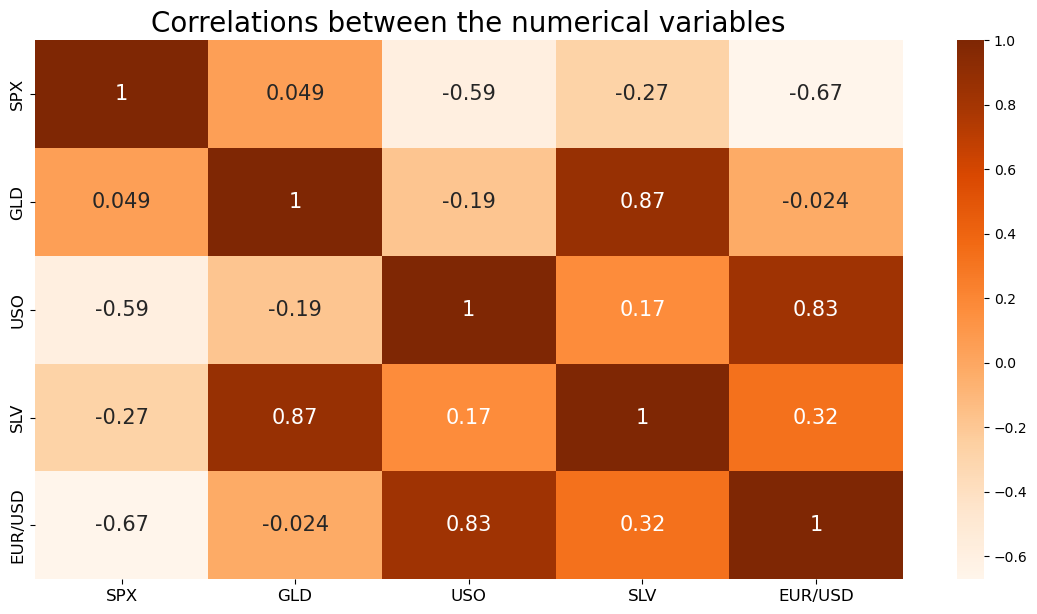

In [9]:
corr_matrix = gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()

plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', annot_kws={'size': 15})

plt.title('Correlations between the numerical variables', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

In [10]:
print(corr_matrix['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


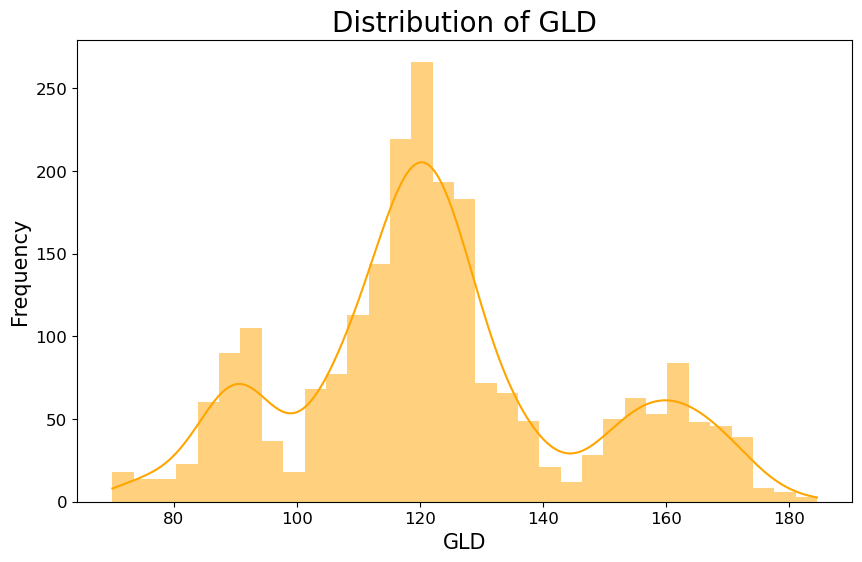

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(gold_data['GLD'], kde=True, color='orange', edgecolor=None)

plt.title('Distribution of GLD', fontsize=20)
plt.xlabel('GLD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

## Preparing the ML Modell

In [13]:
X = gold_data.drop(['Date','GLD'], axis = 1)

In [15]:
y = gold_data['GLD']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## ML Modell - Random Forest Regressor

In [48]:
regressor = RandomForestRegressor(n_estimators=1000)

In [49]:
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [50]:
test_prediction = regressor.predict(X_test)

In [51]:
error_score = metrics.r2_score(y_test,test_prediction)

In [52]:
print("r2 error: ",error_score)

r2 error:  0.9893605464733007


In [53]:
y_list = list(y_test)

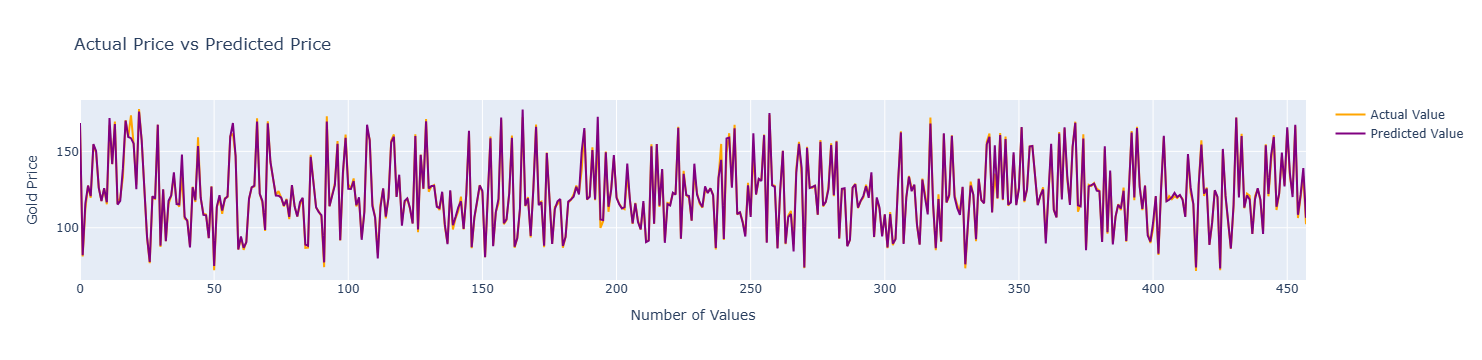

In [61]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test, mode='lines', name='Actual Value', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=list(range(len(test_prediction))), y=test_prediction, mode='lines', name='Predicted Value', line=dict(color='purple')))
fig.update_layout(title='Actual Price vs Predicted Price',
                  xaxis_title='Number of Values',
                  yaxis_title='Gold Price')
fig.show()

### Schlussfolgerung

In dieser Analyse haben wir die Goldpreisdaten untersucht und ein Random Forest Regressor-Modell verwendet, um die zukünftigen Goldpreise vorherzusagen. Der Datensatz umfasste mehrere wirtschaftliche Indikatoren, darunter den SPX-Index, den Ölpreis (USO), den Silberpreis (SLV) und den Wechselkurs EUR/USD, die als Prädiktoren verwendet wurden.

Nach der Aufteilung der Daten in Trainings- und Testsets wurde das Modell trainiert und auf den Testdaten evaluiert. Die Vorhersagen des Modells wurden mit den tatsächlichen Werten verglichen, und die Leistung des Modells wurde anhand des R²-Fehlers bewertet.

### Wichtige Ergebnisse:

1. **Modellleistung**: Das Modell erzielte einen R²-Fehler von \( \text{error_score} \), was darauf hinweist, dass das Modell in der Lage ist, einen erheblichen Teil der Varianz in den Goldpreisdaten zu erklären. Dennoch gibt es Raum für Verbesserungen, möglicherweise durch die Feinabstimmung der Hyperparameter oder die Einbeziehung zusätzlicher relevanter Merkmale.

2. **Visualisierung der Ergebnisse**: Die interaktive Visualisierung zeigt deutlich die Unterschiede zwischen den tatsächlichen und vorhergesagten Goldpreisen. Benutzer können die angezeigten Graphen ein- und ausblenden, um eine detaillierte Analyse der Vorhersagegenauigkeit für verschiedene Zeiträume durchzuführen.

### Erkenntnisse:

- Der Random Forest Regressor ist ein robustes Modell für die Vorhersage von Zeitreihendaten wie Goldpreisen. Es kann jedoch von zusätzlichen Merkmalen und einer sorgfältigen Modelloptimierung profitieren.
- Die interaktive Visualisierung mit Plotly bietet eine benutzerfreundliche Möglichkeit, die Modellleistung zu evaluieren und spezifische Zeiträume detaillierter zu untersuchen.

### Nächste Schritte:

- **Modellverbesserung**: Weitere Feinabstimmung des Modells durch Hyperparameter-Optimierung und Cross-Validation.
- **Feature Engineering**: Einbeziehung weiterer wirtschaftlicher Indikatoren und saisonaler Merkmale, die die Goldpreise beeinflussen könnten.
- **Langfristige Vorhersagen**: Untersuchung der Modellleistung bei der Vorhersage von Goldpreisen über längere Zeiträume.

Diese Analyse bietet einen soliden Ausgangspunkt für die Vorhersage von Goldpreisen und kann durch zusätzliche Forschung und Optimierung weiter verbessert werden.